# End to End Machine Learning With Deployment

### Part 1- EDA of the Medical Dataset
1. Import the libraries
2. Load and View the data
3. Clean the data
4. Complete EDA of the data (deploy a EDA page in streamlit) 

### Part 2- Modelling of the data set
5. Preprocessing for modelling
6. Fit and Evaluate various models
7. Optimize the chosen model
8. Interpret the model
9. Create a pipeline for the model
10. Pickle the model 
11. Deploy the model in streamlit 

In [3]:
from platform import python_version

print(python_version())

3.9.13


!pip install imbalanced-learn

!pip install xgboost

!pip install streamlit

### Step 1: Import the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
print("All needed libraries are imported")

# libraries for preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE

# libraries for modelling
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

# libraries for model evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve
from sklearn.metrics import classification_report

# libraries for deployment
import streamlit as st

### Step 2: Load and View the data

In [ ]:
data=pd.read_csv('data.csv')
data.head(10)

In [ ]:
data.shape

In [ ]:
data.dtypes

In [ ]:
data.isnull().sum()

In [ ]:
data.duplicated().sum()

In [ ]:
data[~data.applymap(np.isreal).any(1)]

In [ ]:
data.describe().T

In [ ]:
data.columns

**Observations**
1. Data has 768 rows and 10 columns 
2. The first column is 'Unnamed: 0' which is redundant
3. All columns are numerical except the Outcome 
4. There are no nulls in the data 
5. However there are nulls present as 0's
6. There are no duplicates or corrupt characters


### Step 3: Clean the data

In [ ]:
# remove the redundant columns
data.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
data.head(2)

In [ ]:
zerofill=lambda x:x.replace(0, x.median())
cols=data.columns[1:6]
data[cols]=data[cols].apply(zerofill, axis=0)

In [ ]:
data.describe().T

In [ ]:
d={'Yes':1, 'No':0}
df=data.copy()
df['Outcome']=df['Outcome'].map(d)

In [ ]:
df.head(2)

### Step 4: Complete EDA of the data ( depoloy a EDA page in streamlit) 

**Univariate Analysis**
1. Numericals -histograms and boxplots 
2. Categorical- barcharts 

**Bivariate Analysis**
1. Categorical vs Numerical barchart
2. Scatter plots and Line plots 
3. Pairplots 

**Corralations**
1. Correlation Matrix
2. Heatmap

**Univariate Analysis**

In [ ]:
def histograms(data):
    print('Histograms')
    data.hist()
    plt.tight_layout()
    plt.show()

In [ ]:
histograms(df)

In [ ]:
def boxplot_histplot(data, feature, bins=None, figsize=(12,7)):
    print("Boxplot and Histplot for ", feature)
    fig, (ax_box, ax_hist)=plt.subplots(
    nrows=2,
    sharex=True,
    gridspec_kw={'height_ratios':(0.25, 0.75)},
    figsize=figsize)
    
    sns.boxplot(data=data, x=feature, showmeans=True, color='orange', ax=ax_box)
    sns.histplot(data=data, x=feature, bins=bins, ax=ax_hist, pallete='green') if bins else sns.\
                         histplot(data=data, x=feature, ax=ax_hist)
    ax_hist.axvline(data[feature].mean(), color='green', linestyle='--')
    ax_hist.axvline(data[feature].median(), color='black', linestyle='-')
    plt.show()

In [ ]:
for col in data.select_dtypes(exclude='O').columns:
    boxplot_histplot(data=data, feature=col, bins=None, figsize=(12,7))

In [ ]:
def barchart(data, feature):
    print("Univariate Countplot of ", feature)
    plt.figure(figsize=(12,7))
    ax=sns.countplot(data=data, x=feature, color='green')
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate("{:.3g}%".format(100.*y/len(df)), (x.mean(), y), ha='center', va='bottom')
    plt.show()

In [ ]:
barchart(data=data, feature='Outcome')

**Observations**
1. Insulin . DPF and Age are highly right skewed and having heavy amoiunt of outliers ( we may need to do data transformation like log) 
2. Age and Pregnancies are also right skewed with some extreme values which may be legit ( need to consukt with domain experts)
3. Outcome variable is highly imbalanced(Yes:No = 1:2) , we need to solve for data imbalance before modelling
4. Missing values have been taken care of
5. Label Encoding is done 

**Bivariate Analysis**
1. Categorical vs Numerical barchart
2. Scatter plots and Line plots 
3. Pairplots 

In [ ]:
def catnum(data, feature1, feature2):
    print("Bivariate Barchart between {0} and {1}".format(feature1, feature2))
    data.groupby(feature1)[feature2].mean().plot(kind='bar', color='orange')
    plt.ylabel(col)
    plt.show()

In [ ]:
for col in data.select_dtypes(exclude='O').columns:
    catnum(data=data, feature1='Outcome', feature2=col)

In [ ]:
def lineplot_scatterplot(data, feature1, feature2):
    plt.figure(figsize=(16,7))
    print("Bivariate Charts for {0} and {1}".format(feature1, feature2))
    plt.subplot(1,2,1)
    sns.lineplot(data=data, x=feature1, y=feature2, color='green')
    plt.title('Lineplot between features')
    
    plt.subplot(1,2,2)
    sns.scatterplot(data=data, x=feature1, y=feature2, color='orange')
    plt.title('Scatterplot between features')
    plt.show() 

In [ ]:
for col in df.select_dtypes(exclude='O').columns:
    lineplot_scatterplot(data=df, feature1='Glucose', feature2=col)

In [ ]:
sns.pairplot(df, kind='reg')

**Corralations**
1. Correlation Matrix
2. Heatmap

In [ ]:
df.corr()

In [ ]:
df[df.columns[:]].corr()['Outcome']

In [ ]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), annot=True, cmap='Spectral', vmin=-1, vmax=+1)

**Observations of Bivariate Analysis**
1. Women with higher Pregnancies, Glucose, DPF, Insulin are more likely to be diabetic
2. Glucose and Insulin, BMI and SkinThickness appear to have hiugh multicollinearity
3. Glucose, BMI appear to be strongest predictors of Diabetes

### App for EDA 

In [ ]:
%%writefile eda.py
import streamlit as st
st.title("The EDA Page")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
st.set_option('deprecation.showPyplotGlobalUse', False)
plt.style.use('fivethirtyeight')

### Step2. Load and View the data

data=pd.read_csv('data.csv')
st.subheader('Data View')
st.write(data.head())

st.subheader('Descriptives')
st.write(data.describe().T)

data.hist()
st.subheader('Histograms')
plt.tight_layout()
st.pyplot()

# End of Part 1

### Step 5: Data Preprocessing
1. Separate the features and label
2. Null value imputation
3. Label Encoding
4. Data imbalance solving
5. Train test split
6. Feature scaling

In [35]:
def preprocess(data, label):
    X = data.drop(label, axis=1)
    y = data[label]
    sm = SMOTE()
    X,y = sm.fit_resample(X,y)
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return x_train, x_test, y_train, y_test

In [36]:
x_train, x_test, y_train, y_test = preprocess(df, 'Outcome')

In [37]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

### Step 6: Fit and Evaluate Models

In [47]:
def print_metrics(y_test, y_pred, model_name):
    print('The results of model:', model_name, end='\n')
    print('Accuracy score = ', accuracy_score(y_test, y_pred), end='\n')
    print('Recall score = ', recall_score(y_test, y_pred), end='\n')
    print('Precision score = ', precision_score(y_test, y_pred), end='\n')
    print('F1 score = ', f1_score(y_test, y_pred))

In [41]:
def plot_metrics(clf, x_test, y_test, model_name):
    plot_confusion_matrix(clf, x_test, y_test, display_labels=[0,1])
    print('')
    plot_roc_curve(clf, x_test, y_test)
    print('')
    plot_precision_recall_curve(clf, x_test, y_test)

In [42]:
y = df['Outcome']
y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [43]:
X = df.drop('Outcome', axis=1)

In [44]:
sm = SMOTE()
X,y = sm.fit_resample(X,y)

In [45]:
y.value_counts()

1    500
0    500
Name: Outcome, dtype: int64

In [48]:
# fit the KNN method

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print_metrics(y_pred, y_test, 'KNN')

The results of model KNN
Accuracy score =  0.78
Recall score =  0.7244094488188977
Precision score =  0.9108910891089109
F1 score =  0.8070175438596492


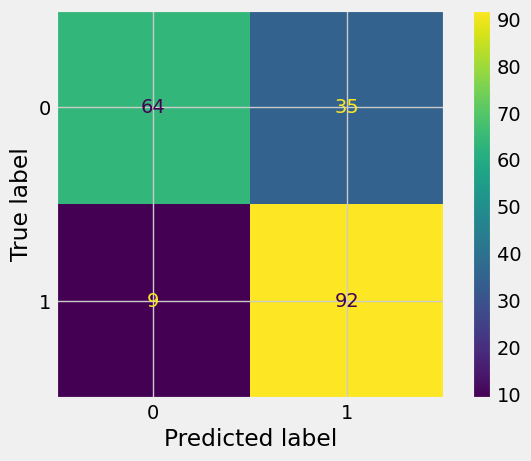

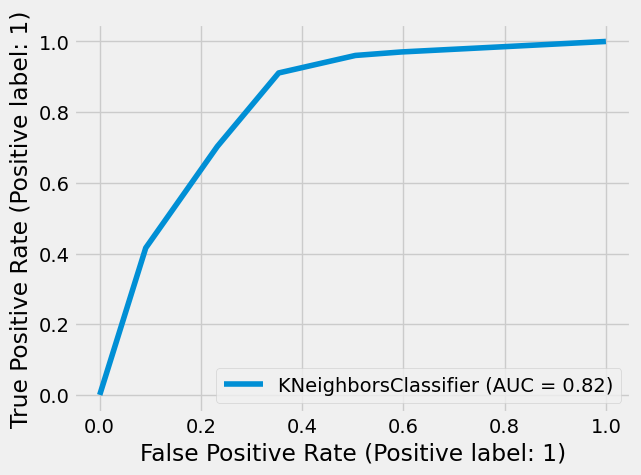

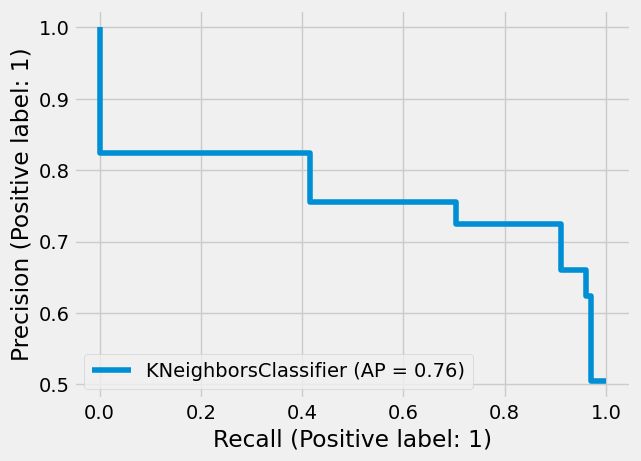

In [51]:
plot_metrics(knn, x_test, y_test, 'KNN')

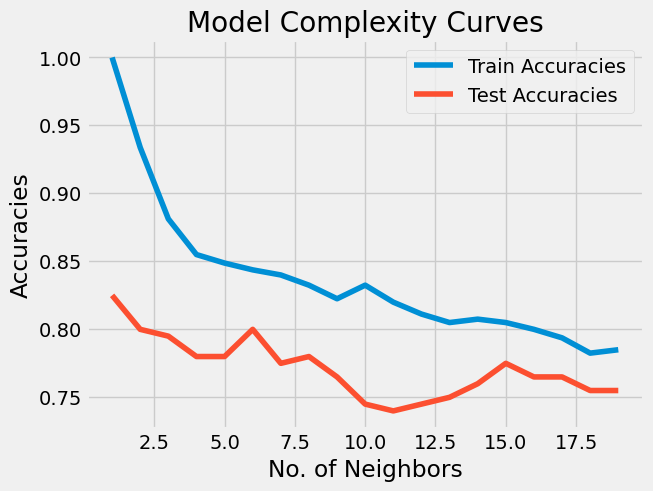

In [52]:
# optimize k

neighbors = np.arange(1,20)
train_accuracies = np.empty(len(neighbors))
test_accuracies = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    train_accuracies[i] = knn.score(x_train, y_train)
    test_accuracies[i] = knn.score(x_test, y_test)
    
plt.plot(neighbors, train_accuracies, label='Train Accuracies')
plt.plot(neighbors, test_accuracies, label='Test Accuracies')
plt.legend()
plt.title('Model Complexity Curves')
plt.xlabel('No. of Neighbors')
plt.ylabel('Accuracies')
plt.show()

In [53]:
#  refit knn for k=16

knn = KNeighborsClassifier(n_neighbors=16)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print_metrics(y_pred, y_test, 'KNN')

The results of model KNN
Accuracy score =  0.765
Recall score =  0.7213114754098361
Precision score =  0.8712871287128713
F1 score =  0.789237668161435


In [59]:
# fit and evaluate all the models and choose the best to deploy

clfs = {
    'LogisticRegression':LogisticRegression(),
    'Naive Bayes':GaussianNB(),
    'KNN':KNeighborsClassifier(),
    'DecisionTree':DecisionTreeClassifier(),
    'RandomForest':RandomForestClassifier(),
    'AdaBoost':AdaBoostClassifier(),
    'GradientBoosting':GradientBoostingClassifier(),
    'XGBoost':XGBClassifier(),
    'SVM':SVC()
}


# creating an empty dataframe of metrics

model_report = pd.DataFrame(columns=['model name', 'accuracy', 'recall', 'precision', 'f1-score'])


# fit and evaluate each model

for clf, clf_name in list(zip(clfs.values(), clfs.keys())):
    clf.fit(x_train, y_train)
    print('Fitting Classifier ...', clf_name)
    y_pred = clf.predict(x_test)
    t = pd.Series({'model name':clf_name, 
                   'accuracy':accuracy_score(y_test, y_pred), 
                   'recall':recall_score(y_test, y_pred), 
                   'precision':precision_score(y_test, y_pred), 
                   'f1-score':f1_score(y_test, y_pred) })
    model_report = model_report.append(t, ignore_index=True)
    
model_report = model_report.sort_values(by='f1-score', ascending=False)
model_report

Fitting Classifier ... LogisticRegression
Fitting Classifier ... Naive Bayes
Fitting Classifier ... KNN
Fitting Classifier ... DecisionTree
Fitting Classifier ... RandomForest
Fitting Classifier ... AdaBoost
Fitting Classifier ... GradientBoosting
Fitting Classifier ... XGBoost
Fitting Classifier ... SVM


,model name,accuracy,recall,precision,f1-score
7,XGBoost,0.795,0.851485,0.767857,0.807512
2,KNN,0.780,0.910891,0.724409,0.807018
4,RandomForest,0.785,0.841584,0.758929,0.798122
6,GradientBoosting,0.780,0.821782,0.761468,0.790476
8,SVM,0.765,0.831683,0.736842,0.781395
5,AdaBoost,0.735,0.772277,0.722222,0.746411
0,LogisticRegression,0.740,0.752475,0.737864,0.745098
1,Naive Bayes,0.745,0.693069,0.777778,0.732984
3,DecisionTree,0.700,0.683168,0.711340,0.696970


In [60]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
print_metrics(y_test, y_pred, 'RFC')

The results of model RFC
Accuracy score =  0.815
Recall score =  0.8811881188118812
Precision score =  0.7807017543859649
F1 score =  0.8279069767441861


### Step 7: Optimize the chosen model

In [63]:
#  optimize the model using GridSearchCV

param_grid = {
    'n_estimators':[100, 150, 200, 250, 300],
    'min_samples_leaf':range(1, 5, 1),
    'min_samples_split':range(2, 10, 2),
    'max_depth':[1,2,3,4,5],
    'criterion':['entropy','gini']
}

n_folds = 3
cv = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=n_folds, n_jobs=-1, verbose=5, return_train_score=False)
cv.fit(x_train, y_train)
cv.best_score_

Fitting 3 folds for each of 800 candidates, totalling 2400 fits


0.8137431593966188

### Step 8: Interpret the model

In [64]:
# lets interpret the model

rfc_tuned = cv.best_estimator_
rfc_tuned

RandomForestClassifier(max_depth=3, min_samples_leaf=4)

In [65]:
!pip install shap

     -------------------------------------- 435.6/435.6 kB 3.9 MB/s eta 0:00:00


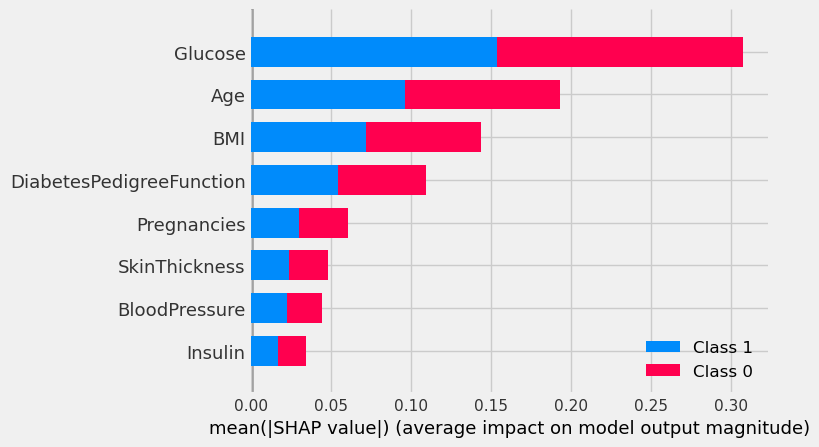

In [67]:
# Feature Importance / Model Interpretation

import shap

value = shap.TreeExplainer(rfc).shap_values(x_test)
shap.summary_plot(value, x_train, plot_type='bar', feature_names=X.columns)

### Step 9: Create a pipeline for the model

In [68]:
# create the deployment model pipeline

from sklearn.pipeline import Pipeline

In [72]:
sc = StandardScaler()
rfc = rfc_tuned
steps = [('SC', sc), ('RFC_Tuned', rfc_tuned)]
pipeline = Pipeline(steps)
x_train, x_test, y_train, y_test = preprocess(df, label='Outcome')
pipeline.fit(x_train, y_train)
y_pred = pipeline.predict(x_test)
print_metrics(y_test, y_pred, 'Pipeline RFC')

The results of model Pipeline RFC
Accuracy score =  0.715
Recall score =  0.7722772277227723
Precision score =  0.6964285714285714
F1 score =  0.7323943661971831


### Step 10: Pickle the model

In [73]:
# lets freeze the model by pickling it

import pickle

model = open('rfc.pickle', 'wb')
pickle.dump(pipeline, model)
model.close()

### Step 11: Deploy the pickled model

In [74]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [1]:
%%writefile app.py
import streamlit as st
import pickle
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

st.title('⚕️Medical Diagnostic Prediction App')
st.markdown('Does the person has Diabetes ?')

# step 1: load the trained model

model = open('rfc.pickle', 'rb')
clf = pickle.load(model)
model.close()


# step 2: get the user input from front end - create widgets

pregs = st.number_input('Pregnancies', 0, 20, 1)
glucose = st.slider('Glucose', 40, 200, 40)
bp = st.slider('BloodPressure', 20, 140, 20)
skin = st.slider('SkinThickness', 7, 99, 7)
insulin = st.slider('Insulin', 14, 850, 14)
bmi = st.slider('BMI', 18, 70, 18)
dpf = st.slider('DiabetesPedigreeFunction', 0.05, 2.5, 0.05)
age = st.slider('Age', 21, 90, 21)

    
# step 3: convert user input to model input

data = {'Pregnancies':pregs,
        'Glucose':glucose,
        'BloodPressure':bp,
        'SkinThickness':skin,
        'Insulin':insulin,
        'BMI':bmi,
        'DiabetesPedigreeFunction':dpf,
        'Age':age}

input_data = pd.DataFrame([data])


# step 4: get the predictions and print the results

predictions = clf.predict(input_data)[0]
if st.button('Predict'):
    if predictions == 0:
        st.write('The person is Healthy')
    if predictions == 1:
        st.write('The person has Diabetes')

Overwriting app.py
